### Data Preparation
In this homework, we will use the California Housing Prices from Kaggle.
Here's a wget-able link:
wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv
The goal of this homework is to create a regression model for predicting housing prices (column 'median_house_value').

Preparing the dataset
For this homework, we only want to use a subset of data. This is the same subset we used in homework #2. But in contrast to homework #2, we are going to use all columns of the dataset.

First, keep only the records where ocean_proximity is either '<1H OCEAN' or 'INLAND'

Preparation:

* Fill missing values with zeros.
* Apply the log transform to median_house_value.
* Do train/validation/test split with 60%/20%/20% distribution.
* Use the train_test_split function and set the random_state parameter to 1.
* Use DictVectorizer(sparse=True) to turn the dataframes into matrices.

In [26]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split # for train test split
from sklearn.feature_extraction import DictVectorizer # for one-hot encoding
from sklearn.tree import DecisionTreeRegressor # decision tree regressor (for q1)
from sklearn.tree import export_text # text output of tree for q1
from sklearn.ensemble import RandomForestRegressor # random forest regressor (for q2)
from sklearn.metrics import mean_squared_error # for q2
from tqdm.auto import tqdm # for q3
import matplotlib.pyplot as plt # for q3
# import xgboost as xgb # for q6
#import matplotlib as mpl
#import seaborn as sb
import wget

In [27]:
url='https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv'
!wget$url

'wgethttps:' is not recognized as an internal or external command,
operable program or batch file.


In [28]:
!head housing.csv

'head' is not recognized as an internal or external command,
operable program or batch file.


In [29]:
df=pd.read_csv(url)
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [30]:
# Keep only  '<1H OCEAN' and 'INLAND' from ocean_proximity
df = df[df['ocean_proximity'].isin(['<1H OCEAN', 'INLAND'])]

# Fill missing values
#print('Missing values\n',df.isnull().sum()[4:5])
df.fillna(0, inplace = True) 

# Log transform to median_house_value
df['median_house_value'] = df['median_house_value'].agg(np.log1p)

# Train/Validation/Test split
df_train_large, df_test = train_test_split(df, test_size = 0.2, random_state = 1)
df_train, df_val = train_test_split(df_train_large, train_size = 0.75, random_state = 1)

Y_train_large = df_train_large['median_house_value'].values
Y_test = df_test['median_house_value'].values
Y_train = df_train['median_house_value'].values
Y_val = df_val['median_house_value'].values

# Drop target variable from train, validation and test sets
df_train_large.drop('median_house_value', axis=1, inplace=True)
df_train.drop('median_house_value', axis=1, inplace=True)
df_val.drop('median_house_value', axis=1, inplace=True)
df_test.drop('median_house_value', axis=1, inplace=True)
# Convert DataFrames to dictionary records
train_dict = df_train.to_dict(orient='records')
train_large_dict = df_train_large.to_dict(orient='records')
val_dict = df_val.to_dict(orient='records')
test_dict = df_test.to_dict(orient='records')

dv = DictVectorizer(sparse=False)

# Fit and transform
X_train = dv.fit_transform(train_dict)
X_train_large = dv.transform(train_large_dict)
X_val = dv.transform(val_dict)
X_test = dv.transform(test_dict)

In [36]:
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)
print(Y_train.shape)

(9411, 10)
(12549, 10)
(3138, 10)
(3138, 10)
(9411,)


### Question - 1
Let's train a decision tree regressor to predict the median_house_value variable.
* Train a model with max_depth=1.

Which feature is used for splitting the data?
* ocean_proximity
* total_rooms
* latitude
* population

In [32]:
# Question 1

# Let's train a decision tree regressor to predict the median_house_value variable.
regressor = DecisionTreeRegressor(max_depth = 1)
# Train a model with max_depth=1.
regressor.fit(X_train, 
              Y_train)

#print(export_text(regressor))
print(export_text(regressor, feature_names=dv.get_feature_names_out().tolist()))

|--- ocean_proximity=<1H OCEAN <= 0.50
|   |--- value: [11.61]
|--- ocean_proximity=<1H OCEAN >  0.50
|   |--- value: [12.30]



### Question-2
Train a random forest model with these parameters:
* n_estimators=10
* random_state=1
* n_jobs=-1 (optional - to make training faster)
1. What's the RMSE of this model on validation?
* 0.045
* 0.245
* 0.545
* 0.845

In [35]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error


rf_regressor=RandomForestRegressor(n_estimators=10,random_state=1,n_jobs=-1)
rf_regressor.fit(X_train,Y_train)
y_pred=rf_regressor.predict(X_val)
rmse=mean_squared_error(Y_val,y_pred,squared=False)
print("Root Mean Squared",rmse)

Root Mean Squared 0.24459962783255346


### Question 3
* Now let's experiment with the n_estimators parameter
* Try different values of this parameter from 10 to 200 with step 10.
* Set random_state to 1.
* Evaluate the model on the validation dataset.
1. After which value of n_estimators does RMSE stop improving? Consider 3 decimal places for retrieving the answer.

* 10
* 25
* 50
* 160

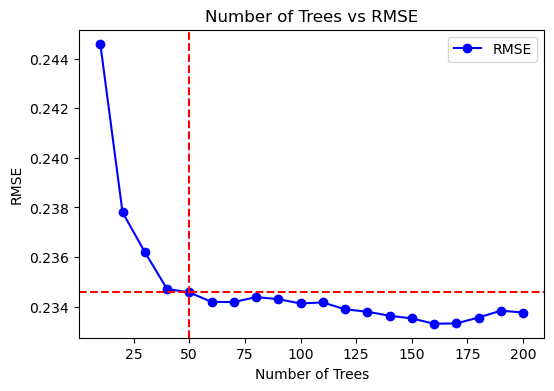

In [38]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import pandas as pd

scores = []
# Define a range of n_estimators values to experiment with
n_estimators_range = range(10, 201, 10)

# Create a Random Forest Regressor with random_state=1
rf_regressor = RandomForestRegressor(random_state=1)

# Loop through different values of n_estimators
for n_estimators in n_estimators_range:
    # Create a new Random Forest Regressor with the current n_estimators value
    rf_regressor = RandomForestRegressor(n_estimators=n_estimators, random_state=1)
    
    # Train the model on the training data
    rf_regressor.fit(X_train, Y_train)
    
    # Make predictions on the validation data
    Y_pred = rf_regressor.predict(X_val)
    
    # Calculate RMSE on the validation data
    rmse = mean_squared_error(Y_val, Y_pred, squared=False)
    scores.append(rmse)

plt.figure(figsize=(6, 4))

plt.plot(n_estimators_range, scores, label='RMSE', marker='o', color = 'blue')
# lines
plt.axvline(x=50, color='red', linestyle='--')
plt.axhline(y=scores[4], color='red', linestyle='--')

plt.title('Number of Trees vs RMSE')
plt.xlabel('Number of Trees')
plt.ylabel('RMSE')
plt.legend()
plt.show()
    


### Question 4
Let's select the best max_depth:
* Try different values of max_depth: [10, 15, 20, 25]
* For each of these values,
* try different values of n_estimators from 10 till 200 (with step 10)
* calculate the mean RMSE
* Fix the random seed: random_state=1
1. What's the best max_depth, using the mean RMSE?
* 10
* 15
* 20
* 25

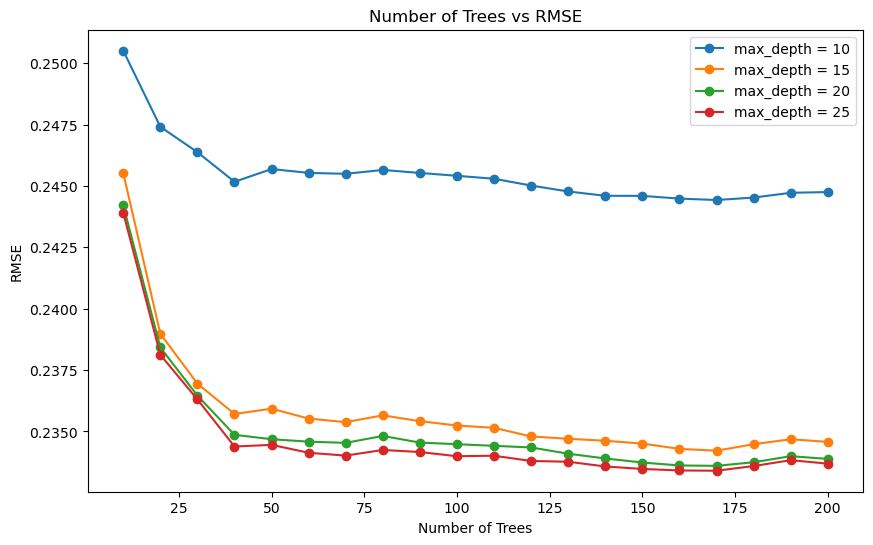

In [49]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

# Define a range of n_estimators values to experiment with
n_estimators_range = range(10, 201, 10)

# Create a dictionary to store RMSE scores for different depths
depth_dict = {}

# Define the depths to explore
depths = [10, 15, 20, 25]

# Loop through different values of max_depth
for depth in depths:
    scores = []  # Initialize a list to store RMSE scores for the current depth
    for n_estimators in n_estimators_range:
        # Create a new Random Forest Regressor with the current max_depth and n_estimators values
        rf_regressor = RandomForestRegressor(max_depth=depth, n_estimators=n_estimators, random_state=1)
    
        # Train the model on the training data
        rf_regressor.fit(X_train, Y_train)
    
        # Make predictions on the validation data
        Y_pred = rf_regressor.predict(X_val)
    
        # Calculate RMSE on the validation data
        rmse = mean_squared_error(Y_val, Y_pred, squared=False)
        scores.append(rmse)
    
    depth_dict[depth] = scores

# Plot the results
plt.figure(figsize=(10, 6))
for depth, scores in depth_dict.items():
    plt.plot(n_estimators_range, scores, label='max_depth = ' + str(depth), marker='o')

plt.legend()
plt.title('Number of Trees vs RMSE')
plt.xlabel('Number of Trees')
plt.ylabel('RMSE')
plt.show()

### Question 5
* We can extract feature importance information from tree-based models.
* At each step of the decision tree learning algorithm, it finds the best split. When doing it, 
* we can calculate "gain" - the reduction in impurity before and after the split. 
* This gain is quite useful in understanding what are the important features for tree-based models.
* In Scikit-Learn, tree-based models contain this information in the feature_importances_ field.

For this homework question, we'll find the most important feature:

* Train the model with these parameters:
n_estimators=10,
max_depth=20,
random_state=1,
n_jobs=-1 (optional)
* Get the feature importance information from this model

What's the most important feature (among these 4)?
* total_rooms
* median_income
* total_bedrooms
* longitude

In [50]:
rf = RandomForestRegressor(n_estimators = 11, max_depth = 20, random_state =1,  n_jobs=-1)
rf.fit(X_train, Y_train)

feature_importance = rf.feature_importances_
feature_names=dv.feature_names_

most_important_features = pd.DataFrame({'feature': feature_names, 'importance': feature_importance} )\
                            .sort_values(by='importance', ascending= True)
display(most_important_features)

,feature,importance
0,households,0.014868
8,total_bedrooms,0.015614
9,total_rooms,0.021405
7,population,0.027904
1,housing_median_age,0.030304
3,longitude,0.086235
2,latitude,0.102663
6,ocean_proximity=INLAND,0.167092
5,ocean_proximity=<1H OCEAN,0.198927
4,median_income,0.334988


### Question 6
Now let's train an XGBoost model! For this question, we'll tune the eta parameter:
Install XGBoost
* Create DMatrix for train and validation
* Create a watchlist
* Train a model with these parameters for 100 rounds:
xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'reg:squarederror',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}

Now change eta from 0.3 to 0.1.

* Which eta leads to the best RMSE score on the validation dataset?

In [55]:
!xgboost

'xgboost' is not recognized as an internal or external command,
operable program or batch file.


In [56]:
import xgboost as xgb
# The DMatrix allows for the XGBoost model to train faster as the DMatrix is optimised for the model. 
features = dv.get_feature_names()
dtrain = xgb.DMatrix(X_train, label=Y_train, feature_names=features)
dval = xgb.DMatrix(X_val, label=Y_val, feature_names=features)

ModuleNotFoundError: No module named 'xgboost'

In [ ]:
# We can store the parameters of the XGBoost model in a dictionary, and use that in our model 
xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,
    'objective': 'reg:squarederror',
    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}
model = xgb.train(xgb_params, dtrain, num_boost_round=10)

In [ ]:
y_pred = model.predict(dval)
roc_auc_score(Y_val, Y_pred)

In [ ]:
# This is to setup evaluation, which is used to produce AUC 
watchlist = [(dtrain, 'train'), (dval, 'val')]
%%capture output
#We use this to capture what is printed out when we train the XGBoost model. 

xgb_params = {
    'eta': 0.1, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)
y_pred = model.predict(dval)
roc_auc_score(Y_val, Y_pred)

In [ ]:
# This is to setup evaluation, which is used to produce AUC 
watchlist = [(dtrain, 'train'), (dval, 'val')]
%%capture output